In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./data/telerama.csv",sep="\t",encoding="utf-8", error_bad_lines=False, low_memory=False)

In [2]:
for i in range(0,len(df)):
    #récupération de la note
    position = df.loc[i,'telerama_json'].find("note")
    note=-1
    if position>0:
        note = df.loc[i,'telerama_json'][position+6:position+7]
    df.loc[i,'note']=note
    
    #récupération du titre
    position1 = df.loc[i,'telerama_json'].find("titre")+8
    position2 = df.loc[i,'telerama_json'].find("genre")-3
    titre=""
    if position1>8 and position1<position2:
        titre = df.loc[i,'telerama_json'][position1:position2]
    df.loc[i,'titre']=titre

    #récupération de l'id imdb
    position1 = df.loc[i,'telerama_json'].find("id_imdb")+10
    position2 = df.loc[i,'telerama_json'].find("titre")-3
    id_imdb=""
    if position1>10 and position1<position2:
        id_imdb = df.loc[i,'telerama_json'][position1:position2]
    df.loc[i,'id_imdb']=id_imdb

In [3]:
#on droppe les colonnes à la con et on cast les notes en integer
df.drop("telerama_json",axis=1,inplace=True)
df.note = pd.to_numeric(df.note, errors='coerce').fillna(-1).astype(np.int64)
df[:10]


,vk_id,telerama_id,reference_url,note,titre,id_imdb
0,234358,30182,http://television.telerama.fr/tele/programmes-...,4,Harvey,0042546
1,90518,30182,http://www.telerama.fr/cinema/films/l-ecureuil...,1,L'\u00c9cureuil rouge,0106305
2,9080,4536,"http://www.telerama.fr/cinema/films/l-aurore,4...",5,L'Aurore,0018455
3,9873,49288,http://television.telerama.fr/tele/programmes-...,5,Le parrain,0068646
4,6167,19773,http://television.telerama.fr/tele/programmes-...,4,Douze hommes en col\u00e8re,0050083
5,61253,7573,"http://www.telerama.fr/cinema/films/psychose,7...",5,Psychose,0054215
6,70089,16762,http://www.telerama.fr/cinema/films/la-nuit-du...,5,La Nuit du chasseur,0048424
7,56670,228880,http://television.telerama.fr/tele/programmes-...,5,M le Maudit,0022100
8,11141,6615,http://www.telerama.fr/cinema/films/les-temps-...,5,Les Temps modernes,0027977
9,7233,8699,http://www.telerama.fr/cinema/films/il-etait-u...,4,Il \u00e9tait une fois dans l'Ouest,0064116


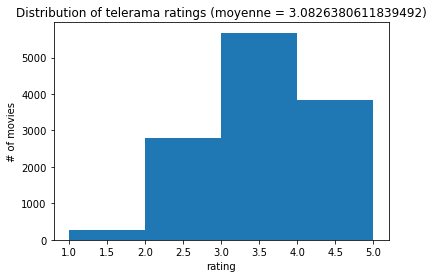

In [4]:
# Distrib des ratings telerama sans les lignes sans note (0 ou -1)
plt.hist(df[df.note>0].note,bins=[1,2,3,4,5])
plt.xlabel("rating")
plt.ylabel("# of movies")
plt.title("Distribution of telerama ratings (moyenne = {})".format(df[df.note>0].note.mean()))

#On affiche
plt.show()

In [5]:
#distribution des données télérama par année de film
dff = pd.read_csv("./data/vod_films.csv",sep="\t",encoding="utf-8", error_bad_lines=False, low_memory=False)
dff = dff.loc[:,{"id","year","title","score"}]
dff=dff.rename(columns = {'id':'vk_id'})
df = df.merge(dff,how='inner',on='vk_id')

#dernier nettoyage, renommage des colonnes & normalisation des scores (note telerama x20)
df = df.loc[:,{"vk_id","note","id_imdb","score","year","title"}]
df=df.rename(columns = {'id':'vk_id'})
df=df.rename(columns = {'note':'score_telerama'})
df=df.rename(columns = {'score':'score_vodkaster'})
df.score_telerama=df.score_telerama*20
df.year = pd.to_numeric(df.year, errors='coerce').fillna(-1).astype(np.int64)

b'Skipping line 22345: expected 28 fields, saw 29\n'


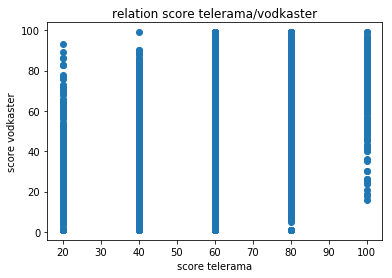

In [6]:
#testons scatterplot telerama/vodkaster
df2 = df[df.score_telerama>0]
plt.scatter(df2.score_telerama,df2.score_vodkaster)
plt.xlabel("score telerama")
plt.ylabel("score vodkaster")
plt.title("relation score telerama/vodkaster")
plt.show()

#Conclusion : MOCHE, faut que je fasse une heatmap pour que ce soit plus lisible

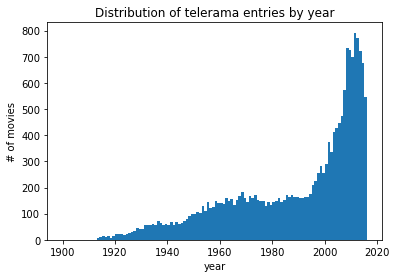

In [16]:
# Distrib des entrées telerama par an
plt.hist(df.year,bins = range (1900,2017))
plt.xlabel("year")
plt.ylabel("# of movies")
plt.title("Distribution of telerama entries by year")

#On affiche
plt.show()

In [17]:
df.to_csv("telerama_cleaned.csv",sep=",")